In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
book = pd.read_csv("Books.csv", encoding='latin1')
book.head()
book.shape

(271360, 8)

In [3]:
rating=pd.read_csv("Ratings.csv",encoding='latin1')
rating.head()
rating.shape

(1149780, 3)

In [4]:
user = pd.read_csv("Users.csv", encoding="latin1", engine="python", on_bad_lines="skip")
user.head()
user.shape

(278858, 3)

In [5]:
book.info()
rating.info()
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), obje

In [14]:
book.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [11]:
rating.isnull().sum()


,0
User-ID,0
ISBN,0
Book-Rating,0


In [12]:
user.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [20]:
book.isnull().mean() * 100


,0
ISBN,0.000000
Book-Title,0.000000
Book-Author,0.000737
Year-Of-Publication,0.000000
Publisher,0.000737
Image-URL-S,0.000000
Image-URL-M,0.000000
Image-URL-L,0.001106


In [16]:
user.isnull().mean() * 100

,0
User-ID,0.000000
Location,0.000000
Age,39.719857


In [17]:
rating.isnull().mean() * 100

,0
User-ID,0.0
ISBN,0.0
Book-Rating,0.0


In [21]:
book = book.dropna()
rating = rating.dropna()
median_age = user['Age'].median()
user['Age'] = user['Age'].fillna(median_age)


In [26]:
book.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [23]:
rating.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [24]:
user.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [30]:
book.duplicated().sum()
rating.duplicated().sum()
user.duplicated().sum()

np.int64(0)

In [31]:
book.describe()
rating.describe()
user.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,33.658568
std,80499.51502,11.282618
min,1.00000,0.000000
25%,69715.25000,29.000000
50%,139429.50000,32.000000
75%,209143.75000,35.000000
max,278858.00000,244.000000


In [32]:
print("Unique Users:", rating['User-ID'].nunique())
print("Unique Books:", rating['ISBN'].nunique())


Unique Users: 105283
Unique Books: 340556


## Visualization

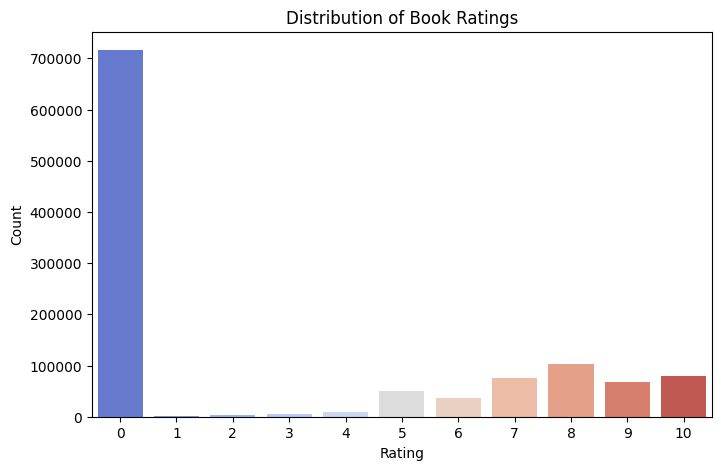

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Book-Rating', data=rating, palette='coolwarm')
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


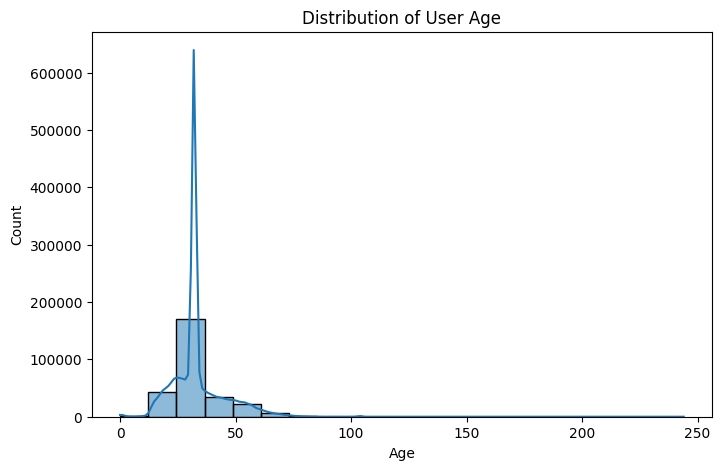

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(user['Age'], bins=20, kde=True)
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [35]:
top_books = rating.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False).head(10)
print(top_books)


ISBN
\9170010242\""    10.0
0553119362        10.0
'9607092910'      10.0
055312000X        10.0
\8887517452\""    10.0
0333782453        10.0
0.330241664       10.0
0.380.44099.7     10.0
0.380.50377.8     10.0
0000000000090     10.0
Name: Book-Rating, dtype: float64


In [36]:
active_users = rating['User-ID'].value_counts().head(10)
print(active_users)


User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64


In [37]:
top_locations = user['Location'].value_counts().head(10)
print(top_locations)


Location
london, england, united kingdom        2506
toronto, ontario, canada               2250
sydney, new south wales, australia     1744
melbourne, victoria, australia         1708
portland, oregon, usa                  1629
chicago, illinois, usa                 1526
seattle, washington, usa               1484
new york, new york, usa                1411
madrid, madrid, spain                  1400
vancouver, british columbia, canada    1359
Name: count, dtype: int64


In [38]:
merged_df = rating.merge(book, on='ISBN').merge(user, on='User-ID')
merged_df.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


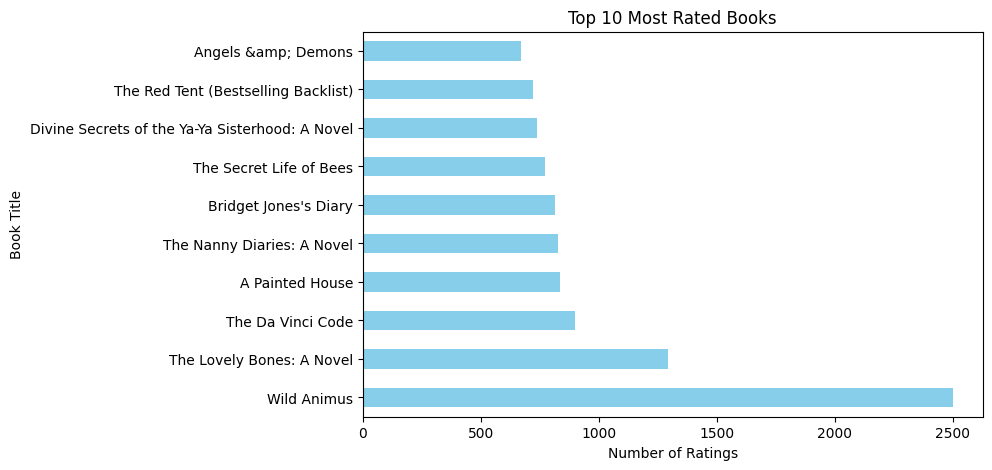

In [39]:
popular_books = merged_df.groupby('Book-Title').size().sort_values(ascending=False).head(10)
popular_books.plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.show()


In [40]:
corr = rating['Book-Rating'].corr(user['Age'])
print("Correlation between Age and Rating:", corr)


Correlation between Age and Rating: 0.005142822097609341
